## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

import torch
from torch import nn

from pytorchers.base import BaseNNRegressor
from pytorchers.reg import NNRegressorEstimator, NNRegressor

## Basic EDA

In [2]:
data = pd.read_csv('../.data/boston.csv').drop('Unnamed: 0', axis=1)

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.isnull().mean()

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

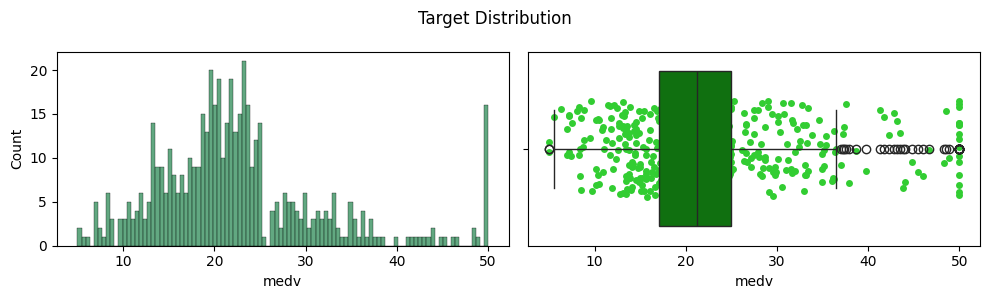

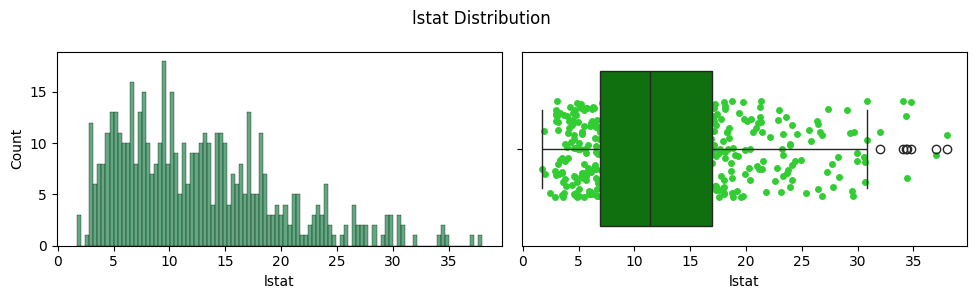

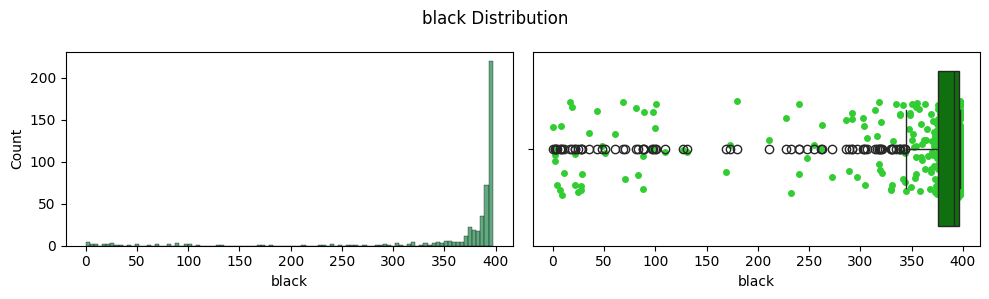

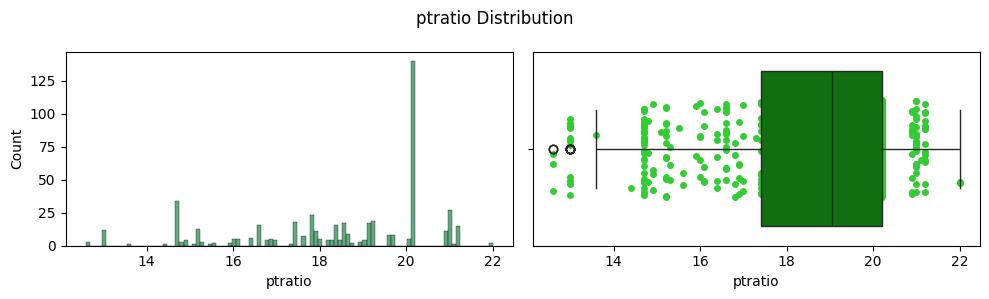

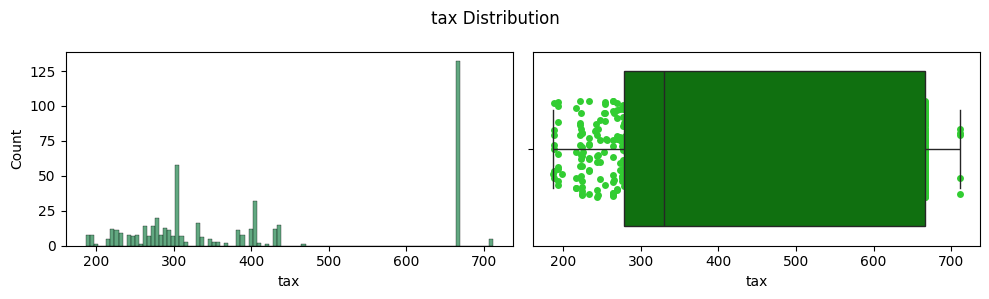

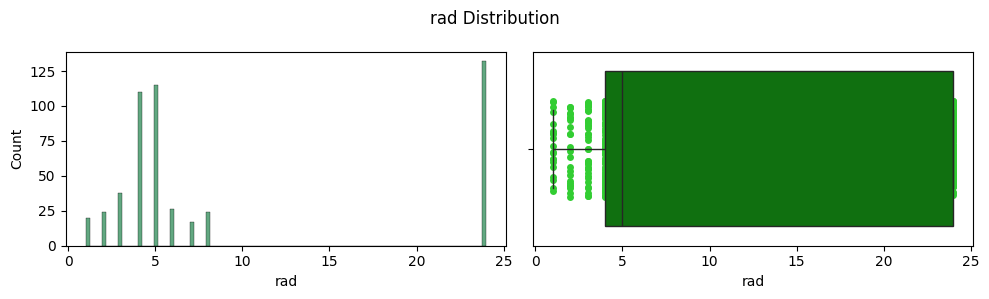

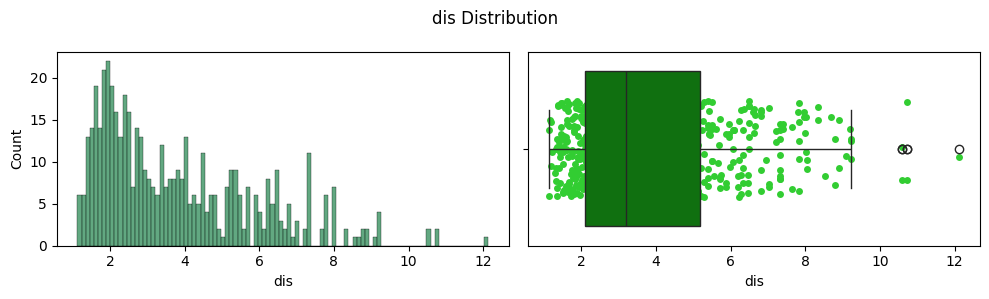

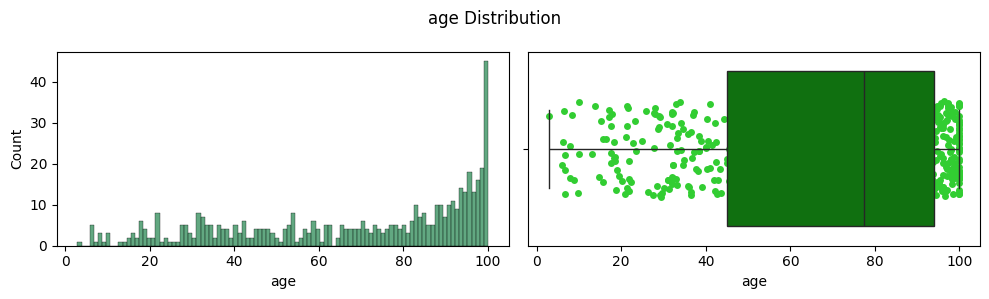

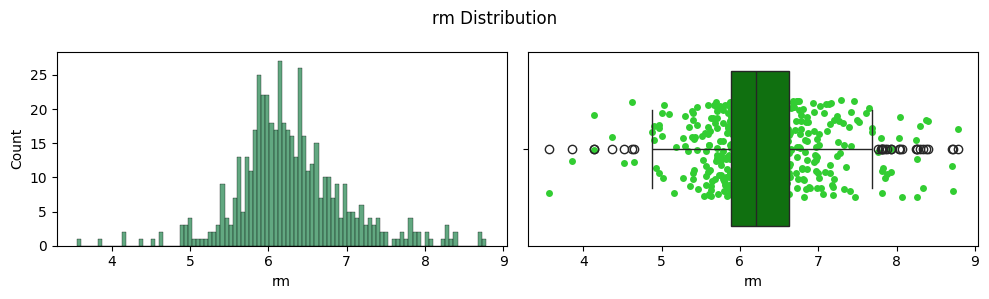

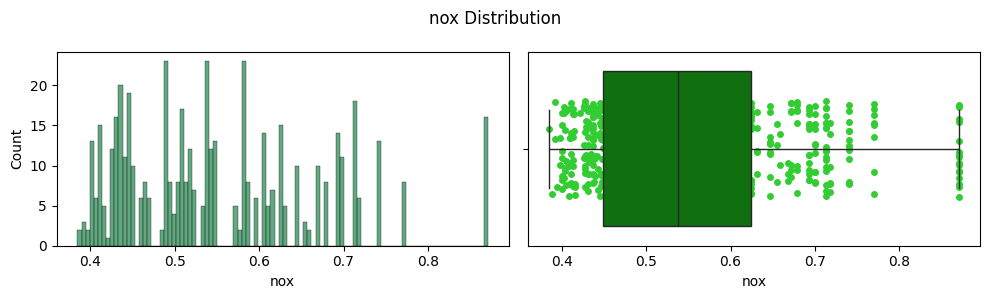

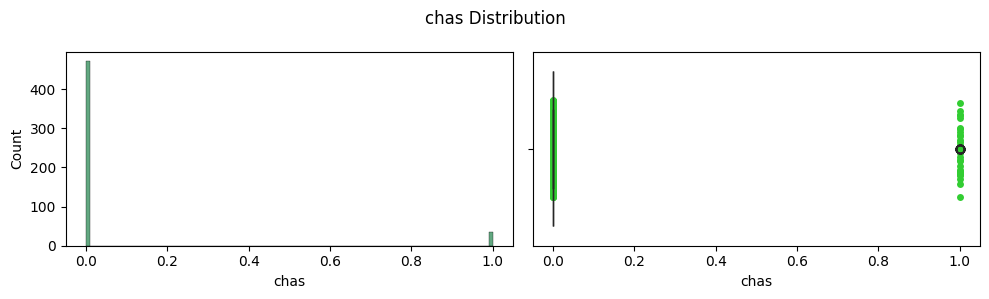

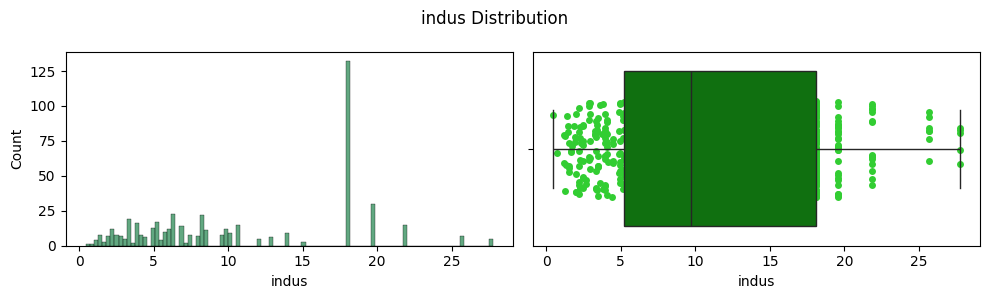

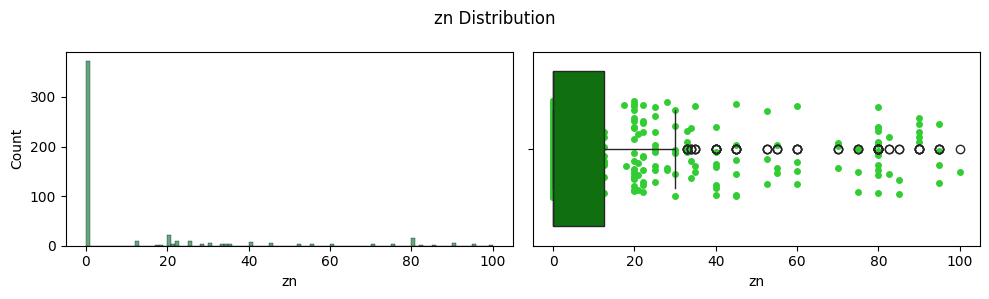

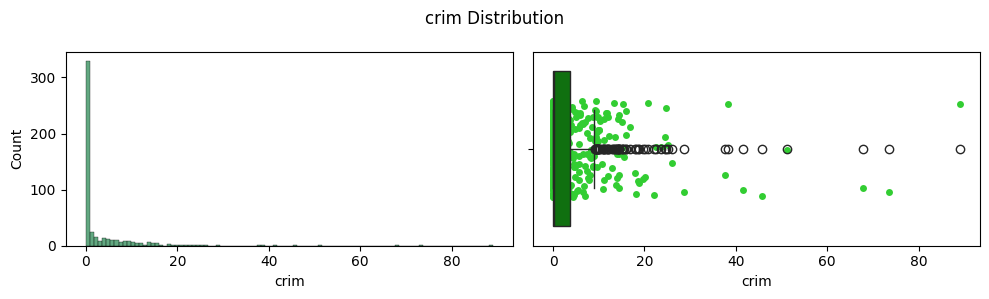

In [6]:
for c in data.columns[::-1]:
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    sns.histplot(data[c], bins=100, color="seagreen", ax=ax[0])
    sns.stripplot(data[c], orient="h", jitter=0.25, zorder=1,color="limegreen", ax=ax[1])
    sns.boxplot(data[c], color="green", orient="h", ax=ax[1])
    c = "Target" if c == "medv" else c
    fig.suptitle(f'{c} Distribution')
    fig.tight_layout()

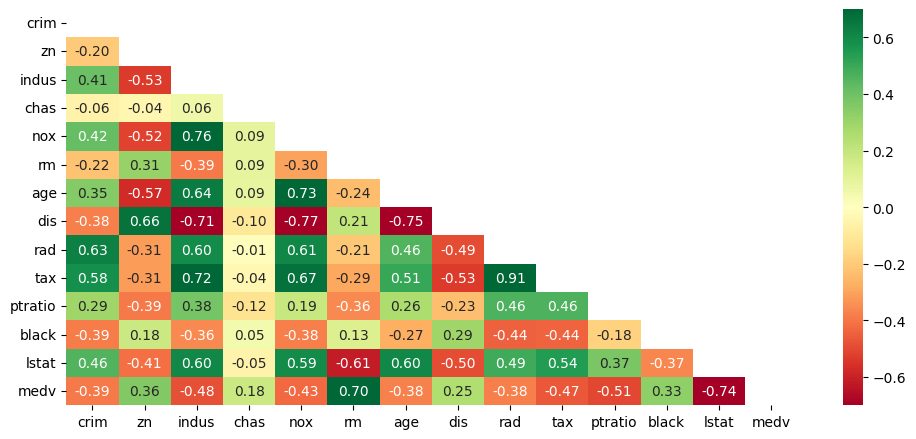

In [7]:
fig, ax = plt.subplots(figsize=(10, 4.5))
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='RdYlGn', 
    center=0, 
    vmax=0.7, 
    vmin=-0.7, 
    fmt=".2f", 
    mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    ax=ax
)
fig.tight_layout()

## Modeling and sklearn compatibility

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('medv', axis=1), 
    data['medv'], 
    test_size=0.2
)

In [4]:
base_model = BaseNNRegressor(input_size=X_train.shape[1], layers=[64, 32], output_size=1)
estimator = NNRegressorEstimator(model=base_model)

In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nn_regressor', estimator)
])

pipe.fit(X_train, y_train)

Epoch: 0/100 - Train Loss 557.9645385742188 - Val Loss: 661.8761596679688
Epoch: 1/100 - Train Loss 549.6932983398438 - Val Loss: 652.5332641601562
Epoch: 2/100 - Train Loss 540.5164184570312 - Val Loss: 642.038330078125
Epoch: 3/100 - Train Loss 529.5303344726562 - Val Loss: 629.1741333007812
Epoch: 4/100 - Train Loss 516.0372924804688 - Val Loss: 612.98046875
Epoch: 5/100 - Train Loss 499.2190856933594 - Val Loss: 592.334228515625
Epoch: 6/100 - Train Loss 478.4723205566406 - Val Loss: 566.6455688476562
Epoch: 7/100 - Train Loss 453.0821838378906 - Val Loss: 534.8243408203125
Epoch: 8/100 - Train Loss 422.3712158203125 - Val Loss: 495.703369140625
Epoch: 9/100 - Train Loss 386.4245910644531 - Val Loss: 449.73150634765625
Epoch: 10/100 - Train Loss 345.0228576660156 - Val Loss: 396.19244384765625
Epoch: 11/100 - Train Loss 299.6006774902344 - Val Loss: 337.5721740722656
Epoch: 12/100 - Train Loss 251.6235809326172 - Val Loss: 275.5921325683594
Epoch: 13/100 - Train Loss 204.3607788085

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('nn_regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,model,"BaseNNRegress..., bias=True) )"
,loss,'mse'
,optimizer,'adam'
,lr,0.001


In [6]:
pipe.predict(X_test)

array([20.486897 , 13.448516 , 26.592873 , 15.792762 , 20.963726 ,
       17.549318 , 41.551086 , 30.363787 , 42.61047  , 22.711336 ,
       19.430668 , 15.356542 , 13.591456 , 28.209198 , 36.19301  ,
       23.557346 , 41.78071  , 22.553024 , 13.319345 , 19.621187 ,
       14.962236 , 21.955399 ,  9.392518 , 12.674953 , 25.632423 ,
       23.739395 , 37.33941  , 23.339718 , 29.813782 , 16.880718 ,
       24.483412 , 24.455284 , 12.877046 , 27.745214 , 14.032093 ,
       21.341934 , 42.24048  , 21.422537 , 32.296383 , 20.413895 ,
       19.755877 , 18.3695   ,  9.284715 ,  8.882793 , 22.50164  ,
       14.830699 , 16.934422 , 21.192013 , 28.39938  , 17.157814 ,
       27.982487 , 16.803692 , 39.909416 , 11.5939245, 16.88549  ,
       25.943054 ,  9.522983 , 25.138954 , 32.98897  , 27.543056 ,
       15.937153 , 18.489723 , 24.217329 , 13.673379 , 14.305032 ,
       15.969405 , 35.97084  , 15.544791 , 19.81979  , 35.16309  ,
       15.647914 , 14.792039 , 17.917692 , 18.718864 , 39.0838

In [7]:
def plot_losses(train_losses, val_losses):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(train_losses, label="Train Loss")
    ax.plot(val_losses, label="Val Loss")
    ax.set_title("Losses")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.grid(True)
    ax.legend()
    fig.tight_layout()

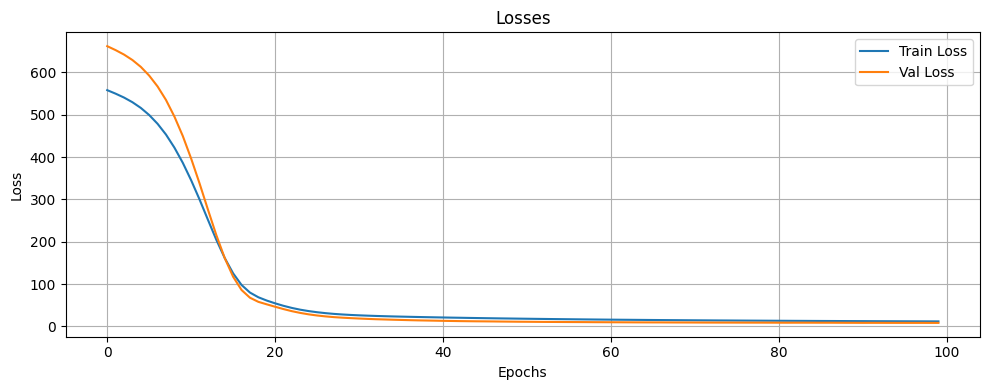

In [8]:
plot_losses(pipe.named_steps['nn_regressor'].train_losses_, pipe.named_steps['nn_regressor'].val_losses_)

In [9]:
# set verbose to False
pipe.named_steps['nn_regressor'].verbose = False

In [10]:
# cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

array([ -9.44177224, -13.20776515,  -9.2367283 , -12.14424729,
       -12.15224392])

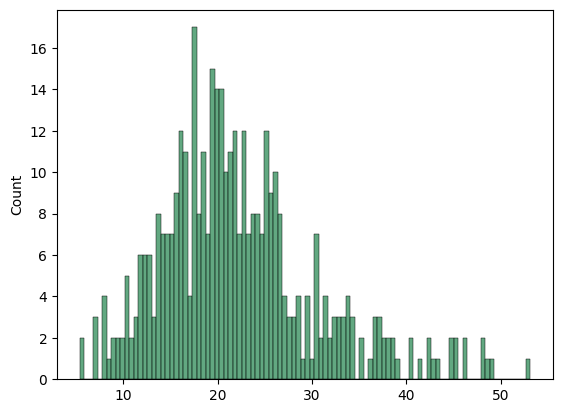

In [11]:
# cross_val_predict
sns.histplot(cross_val_predict(pipe, X_train, y_train, cv=5), bins=100, color="seagreen")
plt.show()

In [12]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nn_regressor', NNRegressor(input_size=X_train.shape[1], layers=[64, 32], output_size=1))
])
pipe.fit(X_train, y_train)

Epoch: 0/100 - Train Loss 547.5360717773438 - Val Loss: 594.1381225585938
Epoch: 1/100 - Train Loss 535.38525390625 - Val Loss: 581.3950805664062
Epoch: 2/100 - Train Loss 518.33642578125 - Val Loss: 563.8690795898438
Epoch: 3/100 - Train Loss 491.7899169921875 - Val Loss: 536.55126953125
Epoch: 4/100 - Train Loss 453.14691162109375 - Val Loss: 497.2046813964844
Epoch: 5/100 - Train Loss 400.4929504394531 - Val Loss: 443.6081237792969
Epoch: 6/100 - Train Loss 332.0067443847656 - Val Loss: 373.8115234375
Epoch: 7/100 - Train Loss 252.61866760253906 - Val Loss: 291.82354736328125
Epoch: 8/100 - Train Loss 175.47361755371094 - Val Loss: 210.65171813964844
Epoch: 9/100 - Train Loss 113.68448638916016 - Val Loss: 142.04209899902344
Epoch: 10/100 - Train Loss 78.38214874267578 - Val Loss: 99.77176666259766
Epoch: 11/100 - Train Loss 62.12685775756836 - Val Loss: 81.14952087402344
Epoch: 12/100 - Train Loss 50.90946578979492 - Val Loss: 69.73663330078125
Epoch: 13/100 - Train Loss 42.4493217

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('nn_regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,input_size,13
,layers,"[64, 32]"
,output_size,1
,loss,'mse'


In [13]:
pipe.predict(X_test)

array([19.035774 , 12.128327 , 26.357517 , 16.201065 , 22.345165 ,
       17.983011 , 41.747726 , 26.573402 , 46.27812  , 22.505293 ,
       19.791924 , 14.67387  , 15.321869 , 27.198833 , 39.187244 ,
       22.935625 , 42.33466  , 20.945644 , 12.549123 , 18.41283  ,
       15.7822485, 23.089119 , 11.262047 , 12.519697 , 26.190266 ,
       22.94038  , 37.12887  , 23.399801 , 31.081207 , 19.271742 ,
       22.755241 , 23.922462 , 18.20076  , 27.28967  , 14.5268345,
       21.872025 , 41.748146 , 22.731022 , 32.3916   , 19.366459 ,
       18.877949 , 18.315033 ,  8.753281 ,  7.871096 , 22.907076 ,
       14.41886  , 16.767479 , 21.568981 , 22.716335 , 18.943935 ,
       28.227331 , 16.471756 , 40.80355  ,  9.980151 , 15.879976 ,
       26.70303  ,  9.964188 , 24.218163 , 33.270294 , 28.208647 ,
       14.490349 , 17.847687 , 24.50645  , 11.191877 , 14.492817 ,
       15.121024 , 34.762886 , 16.493923 , 18.87886  , 29.04428  ,
       15.611567 , 15.243509 , 18.265936 , 17.076283 , 39.8538

In [18]:
pipe.named_steps['nn_regressor'].verbose = False
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

array([-11.15976539, -13.67786098, -12.99371191, -13.46195467,
       -14.43138976])

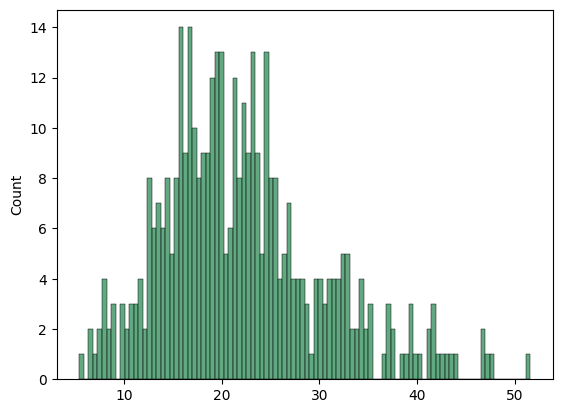

In [19]:
sns.histplot(cross_val_predict(pipe, X_train, y_train, cv=5), bins=100, color="seagreen")
plt.show()